In [1]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.7 GB  | Proc size: 135.8 MB
GPU RAM Free: 11438MB | Used: 1MB | Util   0% | Total 11439MB


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2297754290221264980, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281989632
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12542027588673680888
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [4]:
!cat /proc/meminfo

MemTotal:       13335236 kB
MemFree:         8016356 kB
MemAvailable:   11684308 kB
Buffers:           78888 kB
Cached:          4000332 kB
SwapCached:            0 kB
Active:          1715828 kB
Inactive:        3286668 kB
Active(anon):    1069000 kB
Inactive(anon):    74576 kB
Active(file):     646828 kB
Inactive(file):  3212092 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1120 kB
Writeback:             0 kB
AnonPages:        923316 kB
Mapped:           468764 kB
Shmem:            257020 kB
Slab:             140468 kB
SReclaimable:     101380 kB
SUnreclaim:        39088 kB
KernelStack:        4208 kB
PageTables:         7536 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667616 kB
Committed_AS:    2947960 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# !mkdir gdrive
# !google-drive-ocamlfuse gdrive
!ls '/content/drive/My Drive'

2018_05_Chicago Trip
2018_06 Family in USA
2018_07 Ford Shutdown AZ Trip
APDM D2
awz
Books
Colab
Confession.gdoc
Copy of Confession.gdoc
Cowl Study 20180327.xlsx
Delete It
Ford
GS 7453896 Gaurav Pokharkar 2018 MONTHWISE OVERVIEW.pdf
Jan 2018 to 05 02 2018 Grocery bill.gsheet
keyboard_mouse.py
model_old.h5
My Account Info.zip
Record
Shared with MOM and DAD
Special
Temporary
Udacity_Behavior_Data
Udacity_Share
Untitled spreadsheet.gsheet


In [0]:
# !pip install q keras==2.0.8

In [1]:
import csv
import os
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import sklearn
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, Lambda, Cropping2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


In [2]:
# PATH Variable
# path =  '/content/drive/My Drive/Colab/Project_4_Behavioral_Cloning/'
path = 'C:/Users/Gaurav/Google Drive/Colab/Project_4_Behavioral_Cloning/'
print(path)

C:/Users/Gaurav/Google Drive/Colab/Project_4_Behavioral_Cloning/


In [3]:
# # Logging to file
import logging

# # DISABLE LOGGING
logging.disable(logging.CRITICAL)


# create logger with 'model_app'
logger = logging.getLogger('model_app')
logger.setLevel(logging.DEBUG)
# create file handler which logs even debug messages
fh = logging.FileHandler(path+'/model_logging.txt', mode='w')
fh.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s',datefmt='%m/%d/%Y %I:%M:%S %p')
fh.setFormatter(formatter)
logger.addHandler(fh)
logger.info('============START============')


In [4]:
# for viewing the image
# cv2 reads in as BGR Format
# matplotlib reads in as RGB Format

def view_imgCV2(image):
    plt.imshow(image)
    plt.text(10, 20,'Width {0} Height {1}'.format(image.shape[1],image.shape[0]),backgroundcolor = [1,1,1])
    return 0

0

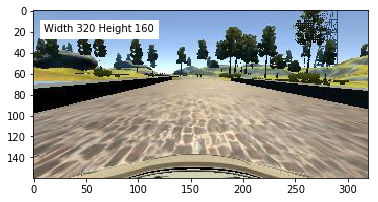

In [5]:
image = mpimg.imread(path+'data/data/IMG/center_2016_12_01_13_30_48_287.jpg')
view_imgCV2(image)

In [6]:
def pre_process(image):
#     Cropping the image bottom 20 and top 50 - New size 90 x 320
#     new_image = image[50:140,:,:]
#     Applying Gaussian Blur
#     new_image = cv2.GaussianBlur(image[50:140,:,:], (3,3), 0)
    return image

0

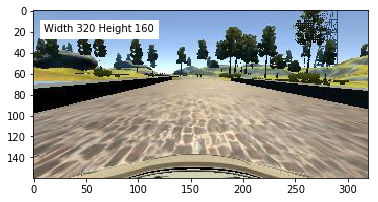

In [7]:
view_imgCV2(pre_process(image))

In [8]:
path = path + 'data/data/'
image_paths = []
angles = []
# Steering angle correction
correction = 0.25
with open(path+'driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        line[0] = path + 'IMG/' + line[0].split('/')[-1]
        line[1] = path + 'IMG/' + line[1].split('/')[-1]
        line[2] = path + 'IMG/' + line[2].split('/')[-1]
        image_paths.append(line[0])
        image_paths.append(line[1])
        image_paths.append(line[2])
        
        angles.append(float(line[3]))
        angles.append(float(line[3])+correction)
        angles.append(float(line[3])-correction)

image_paths = np.array(image_paths)
angles = np.array(angles)

In [9]:
# function to view 20 images in sub-plot
def vizualize_images(images, angles):
    fig, axs = plt.subplots(5,4, figsize=(20, 10))
    axs = axs.ravel()
    for i in range(20):
        image = images[i]
        axs[i].imshow(image)
        axs[i].text(10, 20,'Angle {0:.2f}'.format(angles[i]),backgroundcolor = [1,1,1])
    return 0


(20, 160, 320, 3)


0

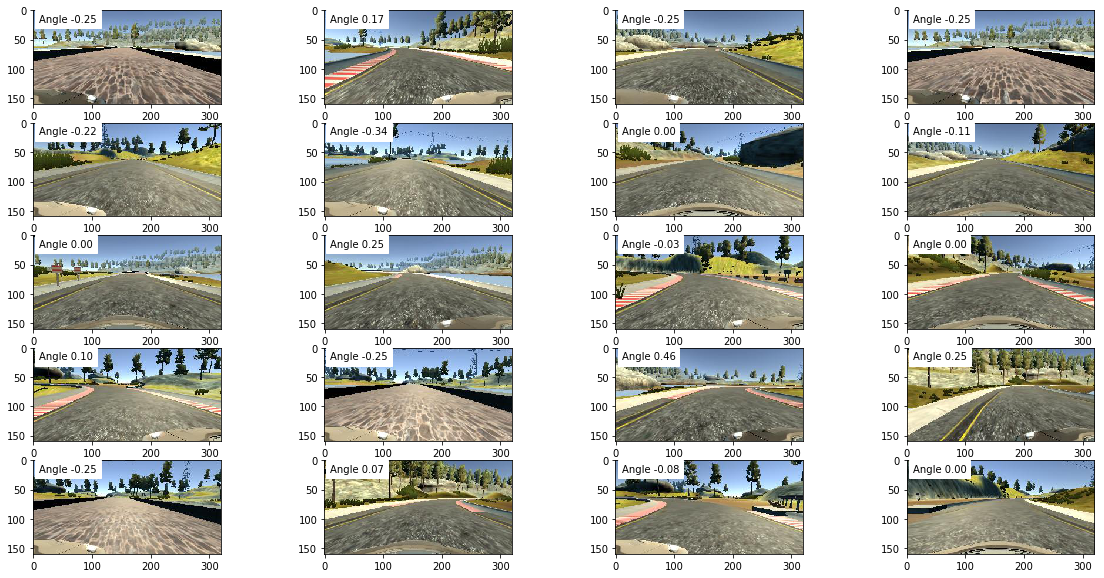

In [10]:
index = np.random.randint(image_paths.shape[0], size = 20)
viz_images = []
for i in index:
    viz_images.append(pre_process(mpimg.imread(image_paths[i])))
viz_images = np.asarray(viz_images)
print(viz_images.shape)
vizualize_images(viz_images, angles[index])

In [0]:
# Function to plot histgram
def plot_histogram(angles, n_bins):
    avg_samples_per_bin = len(angles)/n_bins
    plt.figure(1,figsize=(10,5))
    plt.hist(angles, bins=n_bins)
    plt.xlabel('Steering Angle')
    plt.plot((np.min(angles),(np.max(angles))),(avg_samples_per_bin, avg_samples_per_bin),'k-')
    plt.xlim((np.min(angles),(np.max(angles))))
    plt.show()
    return None

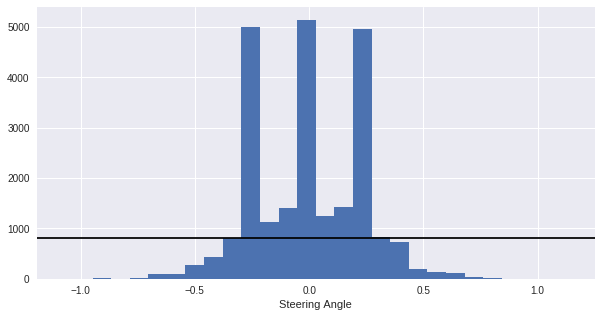

In [19]:
# # Original Data Histogram
# n_bins = 30
# plot_histogram(angles, n_bins)

In [0]:
# Function to delete extra data
def delete_values(image_paths, angles):
#     If number is below average do not delete anything
#     If number is above average delete all that is above the average
    hist, bins = np.histogram(angles, bins=n_bins)
    avg_samples_per_bin = len(angles)/n_bins
    keep_probs = []
    target = avg_samples_per_bin * .5
    for i in range(n_bins):
        if hist[i] < target:
            keep_probs.append(1.)
        else:
            keep_probs.append(1./(hist[i]/target))
            
    remove_list = []
    for i in range(len(angles)):
        for j in range(n_bins):
            if angles[i] > bins[j] and angles[i] <= bins[j+1]:
                # delete from X and y with probability 1 - keep_probs[j]
                if np.random.rand() > keep_probs[j]:
                    remove_list.append(i)
                    
    image_paths = np.delete(image_paths, remove_list, axis=0)
    angles = np.delete(angles, remove_list)
    return image_paths,angles

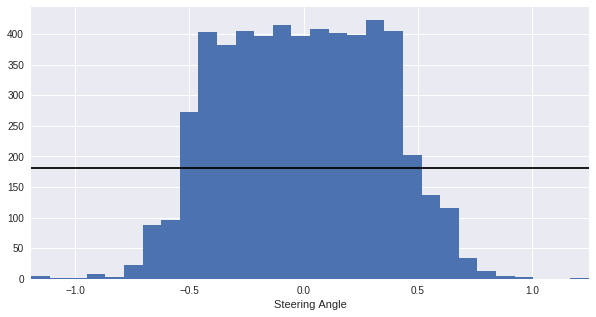

In [21]:
# # Delete data first time 
# image_paths,angles = delete_values(image_paths,angles)
# plot_histogram(angles, n_bins)

In [0]:
# Delete data second time 
# image_paths,angles = delete_values(image_paths,angles)
# plot_histogram(angles, n_bins)

In [23]:
# Flipped -> 0 indicates do not flip the image 1 indicates flip the images
flipped = np.zeros(angles.shape,)
print(flipped.shape)

(5444,)


In [0]:
# Function to augment the data
# flipping images with absolute angles grater than 0.7
def flip_images(image_paths, angles, flipped):
    paths = []
    measurement = []
    flip = []
    for i in range(image_paths.shape[0]):
        paths.append(image_paths[i])
        measurement.append(angles[i])
#         0 indicates do not flip the image
        flip.append(0)
        
        if (abs(angles[i]) >= 0.7):
            paths.append(image_paths[i])
#             Multiply by -1 to flip the angles
            measurement.append(angles[i])
#             1 indicates to flip the image
            flip.append(1)

    return np.array(paths), np.array(measurement), np.array(flip)

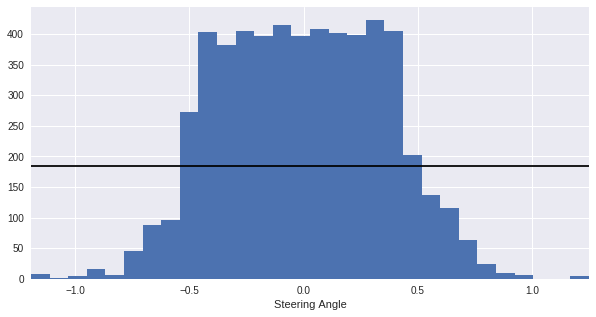

In [25]:
# image_paths, angles, flipped = flip_images(image_paths, angles, flipped)
# plot_histogram(angles, n_bins)

In [26]:
X_train_paths, X_test_paths, y_train, y_test, flipped_train, flipped_test = train_test_split(image_paths, angles, flipped, test_size=0.15)
print('Original:', image_paths.shape,angles.shape, flipped.shape)
print('Train:', X_train_paths.shape, y_train.shape, flipped_train.shape)
print('Test:', X_test_paths.shape, y_test.shape, flipped_test.shape)

Original: (5537,) (5537,) (5537,)
Train: (4706,) (4706,) (4706,)
Test: (831,) (831,) (831,)


In [0]:
def image_generator(image_paths, angles, flipped, batch_size=32):
    num_samples = angles.shape[0]
    while 1: # Loop forever so the generator never terminates
        sklearn.utils.shuffle(image_paths, angles, flipped)
        for offset in range(0, num_samples, batch_size):
            batch_paths = image_paths[offset:offset+batch_size]
            batch_angles = angles[offset:offset+batch_size]
            batch_flip = flipped[offset:offset+batch_size]
            images = []
            measurements = []
            for i in range(len(batch_paths)):
                if (batch_flip[i] == 1):
                    image = cv2.flip(mpimg.imread(str(batch_paths[i])),1)
                    image = pre_process(image)
                    angle = float(- 1* batch_angles[i])
                else:
                    image = mpimg.imread(str(batch_paths[i]))
                    image = pre_process(image)
                    angle = float(batch_angles[i])
        
                images.append(image)
                measurements.append(angle)
            
        
    # trim image to only see section with road
            X = np.array(images)
            y = np.array(measurements)
            yield X, y

In [0]:
# compile and train the model using the generator function
train_generator = image_generator(X_train_paths, y_train, flipped_train, batch_size=32)
test_generator = image_generator(X_test_paths, y_test, flipped_test, batch_size=32)

In [0]:
# for i in range(1):
#     my_output = (next(train_generator))
# print(my_output[0].shape)

In [0]:
# image = cv2.imread(str(image_paths[0]))
# print(image.shape)
# print(image[...,::-1].shape)
# print(type(image))
# print(type(image[...,::-1]))
# print(image.dtype)
# print(image[...,::-1].dtype)

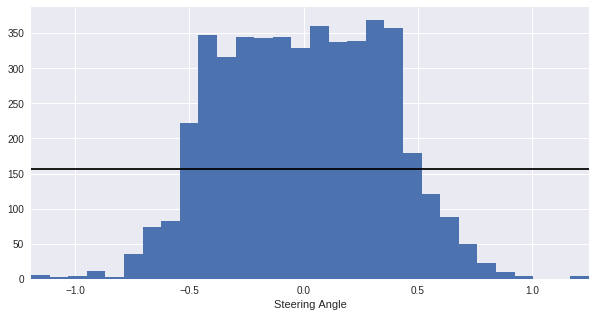

In [31]:
plot_histogram(y_train, n_bins)

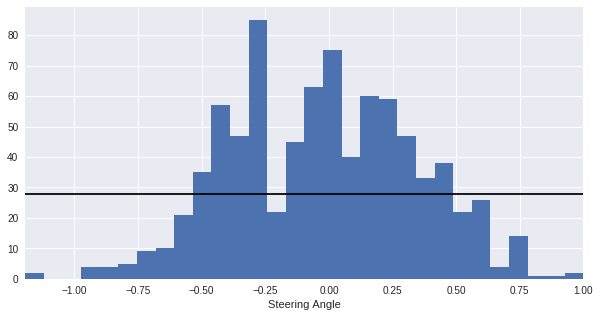

In [32]:
plot_histogram(y_test, n_bins)

In [0]:
# LeNet Architecture
# image = mpimg.imread(str(image_paths[0]))
# row, col, ch = pre_process(image).shape
# model = Sequential()
# # model.add(Cropping2D(cropping=((60,20), (0,0)), input_shape=(160,320,3)))
# model.add(Lambda(lambda x: x/127.5 - 1.,
#         input_shape=(row, col, ch),
#         output_shape=(row, col, ch)))

# model.add(Conv2D(6, (5, 5), activation = 'relu', input_shape=(row, col, ch)))
# model.add(MaxPooling2D())
# model.add(Conv2D(6, (5, 5), activation = 'relu', input_shape=(row, col, ch)))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(120))
# model.add(Dense(84))
# model.add(Dense(1))

# print(pre_process(image).shape)

In [34]:
# Nvidia Architecture
# image = mpimg.imread(str(image_paths[0]))
row, col, ch = 90, 320, 3
model = Sequential()
model.add(Lambda(lambda x: (x/127.5) - 1, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping = ((50,20), (0,0))))
model.add(Conv2D(24, (5,5), subsample = (2,2), activation = 'relu'))
model.add(Conv2D(36, (5,5), subsample = (2,2), activation = 'relu'))
model.add(Conv2D(48, (5,5), subsample = (2,2), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  import sys


In [35]:
model.summary()
print(path)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 33, 64)         36928     
__________

In [36]:
model.compile(loss = 'mse',optimizer = 'adam')
checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab/Project_4_Behavioral_Cloning/model{epoch:02d}.h5')
history_object = model.fit_generator(train_generator, steps_per_epoch= y_train.shape[0],
                                     validation_data=test_generator,
                                     validation_steps=y_test.shape[0], epochs = 10, verbose = 1, callbacks=[checkpoint])

# Model Save
model.save('/content/drive/My Drive/Colab/Project_4_Behavioral_Cloning/model_gbp.h5')

Epoch 1/10
4706/4706 [==============================] - 2290s 487ms/step - loss: 0.0149 - val_loss: 0.0239
Epoch 2/10
4706/4706 [==============================] - 1096s 233ms/step - loss: 0.0037 - val_loss: 0.0246
Epoch 3/10
4706/4706 [==============================] - 1095s 233ms/step - loss: 0.0026 - val_loss: 0.0263
Epoch 4/10
4706/4706 [==============================] - 1080s 229ms/step - loss: 0.0018 - val_loss: 0.0263
Epoch 5/10
4706/4706 [==============================] - 1098s 233ms/step - loss: 0.0016 - val_loss: 0.0261
Epoch 6/10
4706/4706 [==============================] - 1104s 235ms/step - loss: 0.0014 - val_loss: 0.0259
Epoch 7/10
4706/4706 [==============================] - 1103s 234ms/step - loss: 0.0012 - val_loss: 0.0272
Epoch 8/10
4706/4706 [==============================] - 1104s 235ms/step - loss: 0.0011 - val_loss: 0.0255
Epoch 9/10
4706/4706 [==============================] - 1102s 234ms/step - loss: 0.0013 - val_loss: 0.0275
Epoch 10/10
4706/4706 [==============

dict_keys(['val_loss', 'loss'])


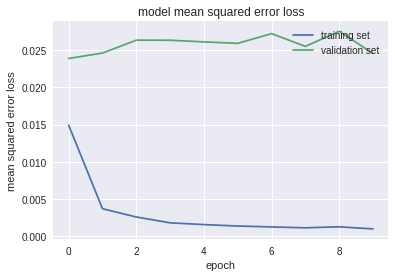

In [37]:
print(history_object.history.keys())
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [0]:
# CLOSING THE LOGGER FILE
logger.info('============CLOSE============')
fh.flush()
fh.close()
logger.removeHandler(fh)